In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [17]:
file_path = r"C:\Users\iratx\OneDrive\Documents\Máster\Segundo año\Segundo semestre\TFM\Resultados\10_benchmark_cases_results.csv"
df = pd.read_csv(file_path, sep=";")

df.head(20)


,Case,Prompt,LLM,Ground Truth,Prediction
0,1,P1,GPT-4o,1,1
1,2,P1,GPT-4o,1,1
2,3,P1,GPT-4o,1,1
3,4,P1,GPT-4o,1,1
4,5,P1,GPT-4o,1,1
5,6,P1,GPT-4o,1,1
6,7,P1,GPT-4o,1,1
7,8,P1,GPT-4o,0,0
8,9,P1,GPT-4o,0,0
9,10,P1,GPT-4o,0,0


In [18]:
# List of unique prompts and LLMs
prompts = df["Prompt"].unique()
llms = df["LLM"].unique()

# Store results
metrics = []

In [19]:
# Compute **weighted** metrics for each (Prompt, LLM) combination
for prompt in prompts:
    for llm in llms:
        subset = df[(df["Prompt"] == prompt) & (df["LLM"] == llm)]
        
        y_true = subset["Ground Truth"]
        y_pred = subset["Prediction"]
        
        acc = accuracy_score(y_true, y_pred)
        prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted", zero_division=0)
        
        metrics.append([prompt, llm, acc, prec, rec, f1])

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics, columns=["Prompt", "LLM", "Accuracy", "Precision", "Recall", "F1 Score"])

# Save results to a CSV file
metrics_df.to_csv("llm_benchmark_evaluation_results.csv", index=False)

# Print summary
print(metrics_df)

  Prompt       LLM  Accuracy  Precision  Recall  F1 Score
0     P1    GPT-4o       1.0     1.0000     1.0  1.000000
1     P1  Deepseek       0.9     0.9125     0.9  0.893333
2     P4    GPT-4o       0.9     0.9125     0.9  0.893333
3     P4  Deepseek       0.9     0.9125     0.9  0.893333
4     P5    GPT-4o       0.9     0.9125     0.9  0.893333
5     P5  Deepseek       1.0     1.0000     1.0  1.000000
6     P6    GPT-4o       0.9     0.9125     0.9  0.893333
7     P6  Deepseek       0.9     0.9125     0.9  0.893333


In [24]:
import numpy as np
from scipy.stats import ttest_rel

# Define the metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

# Benchmark case scores
benchmark_scores = {
    "Accuracy": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "Precision": [1.0000, 0.9125, 0.9125, 0.9125, 0.9125, 1.0000, 0.9125, 0.9125],
    "Recall": [1.0, 0.9, 0.9, 0.9, 0.9, 1.0, 0.9, 0.9],
    "F1 Score": [1.0000, 0.893333, 0.893333, 0.893333, 0.893333, 1.0000, 0.893333, 0.893333],
}

# Pathway-based case scores
pathway_scores = {
    "Accuracy": [0.933333, 0.7, 0.8, 0.8, 0.8, 0.8, 0.733333, 0.833333],
    "Precision": [0.882353, 0.625, 0.846154, 0.764706, 0.8, 0.736842, 0.733333, 0.75],
    "Recall": [1.0, 1.0, 0.733333, 0.866667, 0.8, 0.933333, 0.733333, 1.0],
    "F1 Score": [0.9375, 0.769231, 0.785714, 0.8125, 0.8, 0.823529, 0.733333, 0.857143],
}

# Perform paired t-tests
t_test_results = []
for metric in metrics:
    t_stat, p_value = ttest_rel(benchmark_scores[metric], pathway_scores[metric])
    t_test_results.append({"Metric": metric, "T-Statistic": t_stat, "P-Value": p_value})

# Convert results to DataFrame and display
import pandas as pd
df_t_test = pd.DataFrame(t_test_results)

# Show results
print(df_t_test)


      Metric  T-Statistic   P-Value
0   Accuracy     6.354903  0.000383
1  Precision     6.263899  0.000418
2     Recall     1.122049  0.298850
3   F1 Score     6.265632  0.000418


C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:30: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\830797802.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)
C:\Users\iratx\AppData\Local\Temp\ipykernel_23056\8

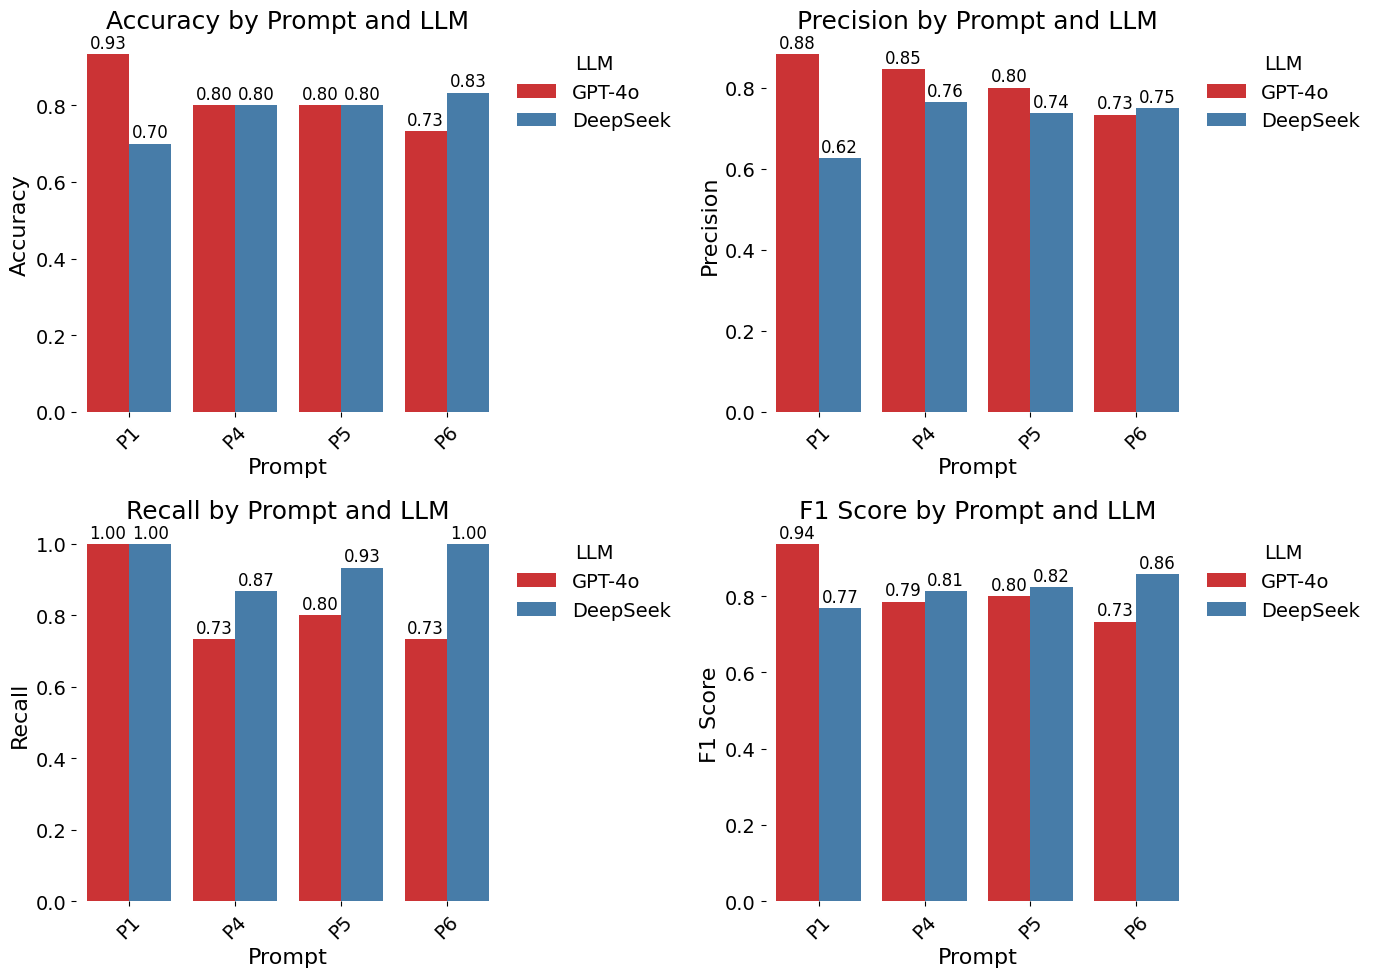

Mean scores per LLM:
           Accuracy  Precision    Recall  F1 Score
LLM                                              
DeepSeek  0.783333   0.719137  0.950000  0.815601
GPT-4o    0.816667   0.815460  0.816667  0.814137

Mean scores per Prompt:
         Accuracy  Precision    Recall  F1 Score
Prompt                                         
P1      0.816667   0.753676  1.000000  0.853365
P4      0.800000   0.805430  0.800000  0.799107
P5      0.800000   0.768421  0.866667  0.811765
P6      0.783333   0.741667  0.866667  0.795238


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "30_cases_evaluation_results.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 comes after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("Set1")  # Colorblind-friendly colors

# Set font size for all texts
plt.rcParams.update({'font.size': 14})

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette, edgecolor='none')  # Remove borders
    ax.set_title(f"{metric} by Prompt and LLM", fontsize=18)
    ax.set_xlabel("Prompt", fontsize=16)
    ax.set_ylabel(metric, fontsize=16)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1), fontsize=14, frameon=False)  # Remove legend frame
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=14)

    # Add values on top of each bar, excluding zero values
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with non-zero height
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')

# Remove the borders around the plot area
for ax in axes.flatten():
    for sp in ax.spines.values():
        sp.set_visible(False)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM:\n", llm_means)
print("\nMean scores per Prompt:\n", prompt_means)




C:\Users\iratx\AppData\Local\Temp\ipykernel_21508\1070007579.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_21508\1070007579.py:27: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_21508\1070007579.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_21508\1070007579.py:27: UserWarning: The palette lis

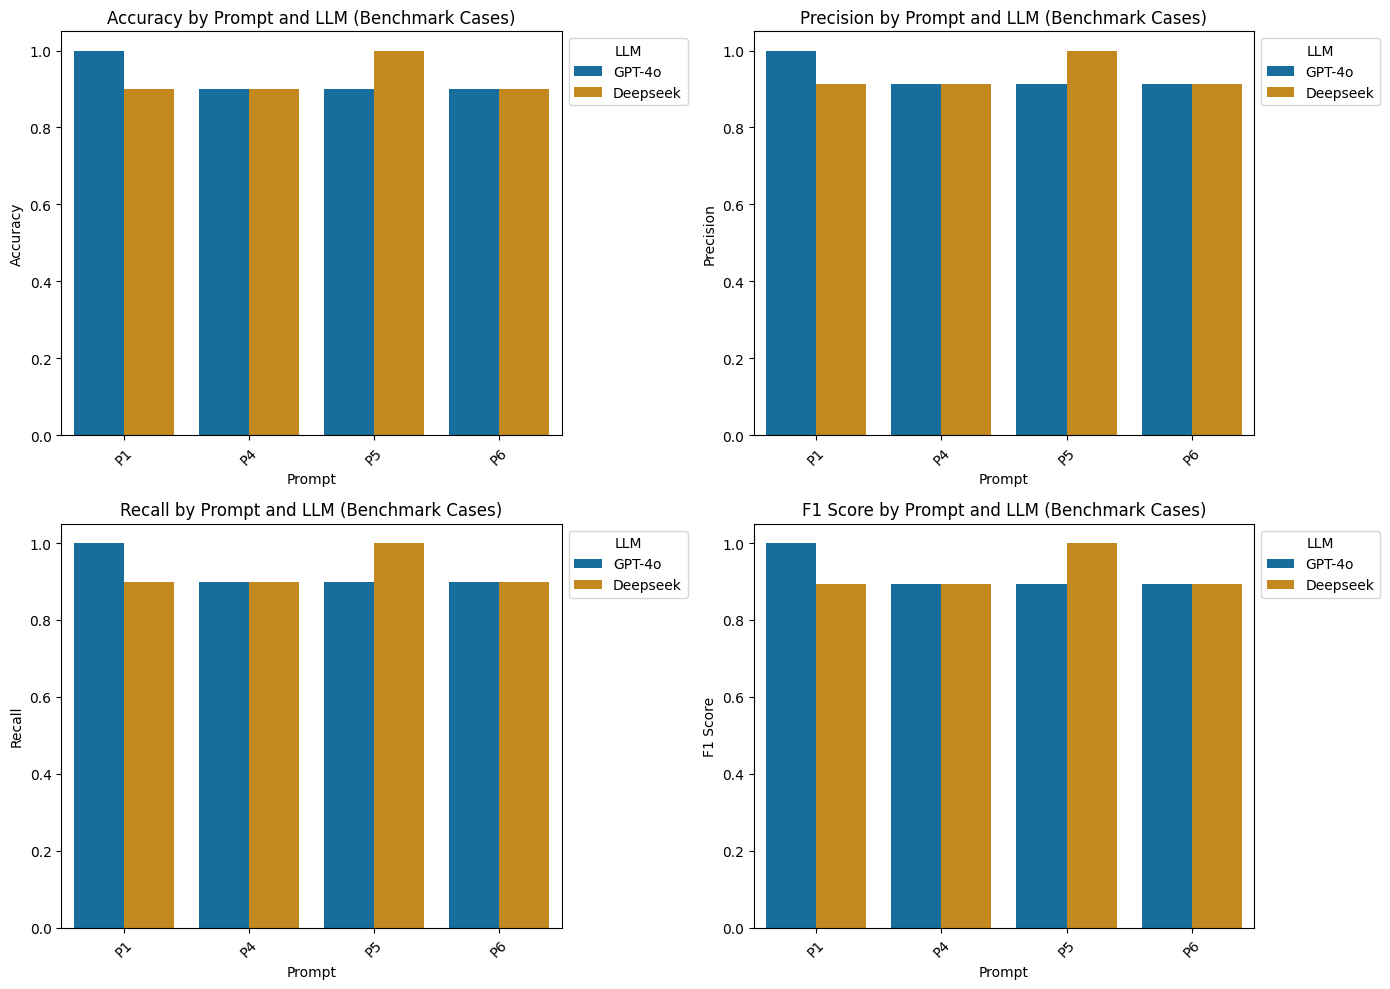

Mean scores per LLM (Benchmark Cases):
           Accuracy  Precision  Recall  F1 Score
LLM                                            
Deepseek     0.925   0.934375   0.925      0.92
GPT-4o       0.925   0.934375   0.925      0.92

Mean scores per Prompt (Benchmark Cases):
         Accuracy  Precision  Recall  F1 Score
Prompt                                       
P1          0.95    0.95625    0.95  0.946667
P4          0.90    0.91250    0.90  0.893333
P5          0.95    0.95625    0.95  0.946667
P6          0.90    0.91250    0.90  0.893333


In [9]:
# --- VISUALIZATION ---
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "llm_benchmark_evaluation_results.csv"
df = pd.read_csv(file_path)

# Ensure the 'Prompt' column is sorted numerically
df["Prompt"] = pd.Categorical(df["Prompt"], 
                              categories=sorted(df["Prompt"].unique(), key=lambda x: int(x[1:])), 
                              ordered=True)

# Compute mean scores per LLM
llm_means = df.groupby("LLM")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt (and sort it correctly)
prompt_means = df.groupby("Prompt")[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means = prompt_means.sort_index()  # Ensures P10 appears correctly after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df, x="Prompt", y=metric, hue="LLM", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and LLM (Benchmark Cases)")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="LLM", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM (Benchmark Cases):\n", llm_means)
print("\nMean scores per Prompt (Benchmark Cases):\n", prompt_means)

C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1675604872.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prompt_means_combined = df_combined.groupby(["Prompt", "Case Type"])[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1675604872.py:42: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.barplot(data=df_combined, x="Prompt", y=metric, hue="Case Type", ax=ax, palette=colorblind_palette)
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\1675604872.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\iratx\AppData\Local\Temp\ipykernel_5004\16

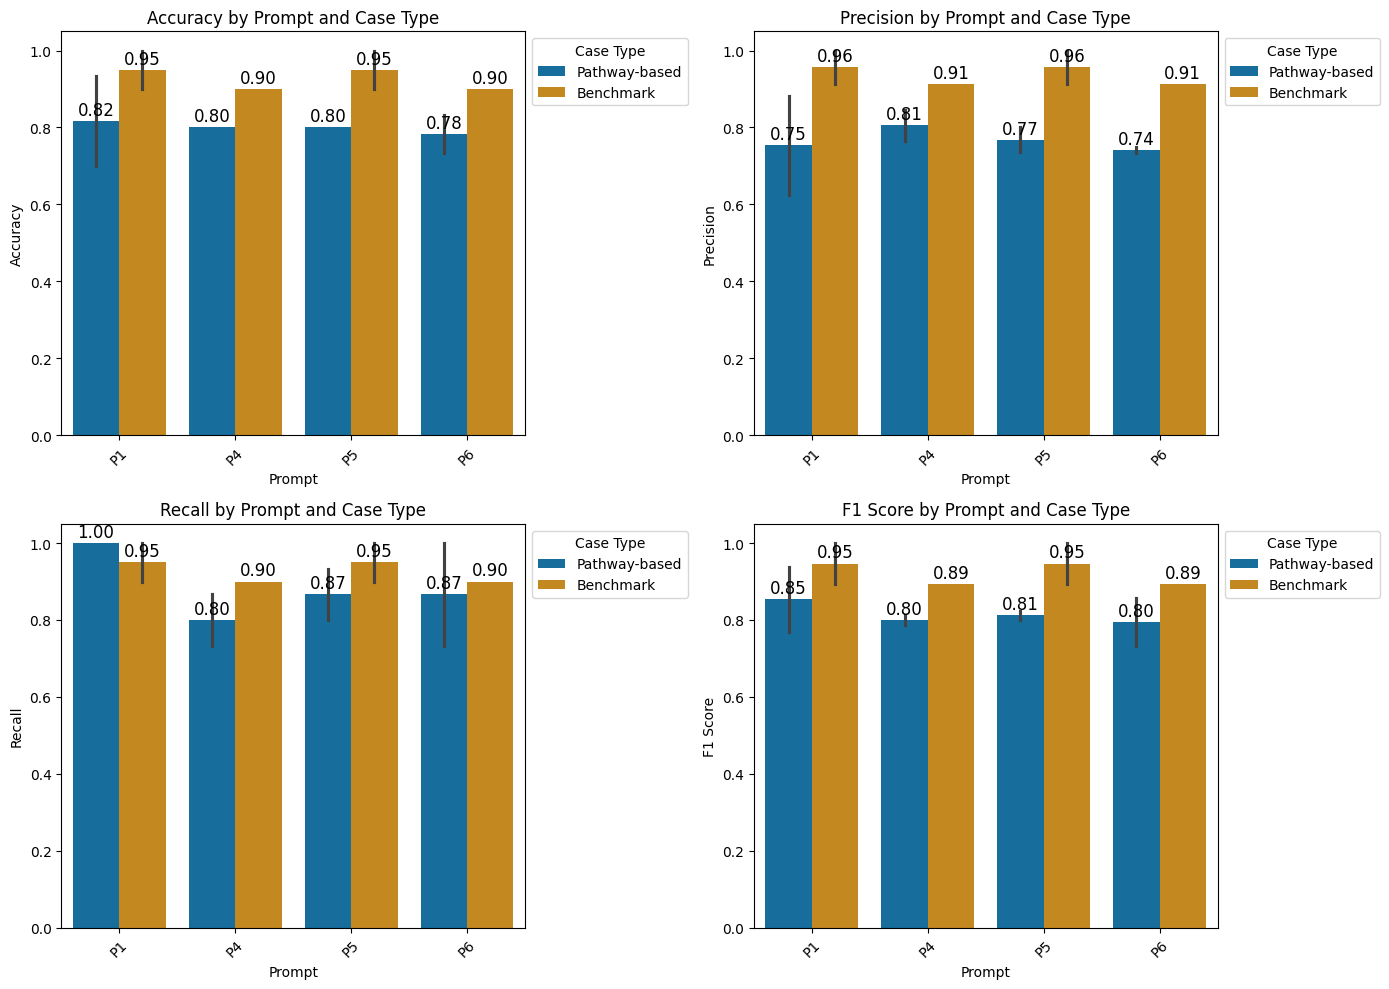

Mean scores per LLM (combined):
                         Accuracy  Precision    Recall  F1 Score
LLM      Case Type                                             
DeepSeek Pathway-based  0.783333   0.719137  0.950000  0.815601
Deepseek Benchmark      0.925000   0.934375  0.925000  0.920000
GPT-4o   Benchmark      0.925000   0.934375  0.925000  0.920000
         Pathway-based  0.816667   0.815460  0.816667  0.814137

Mean scores per Prompt (combined):
                       Accuracy  Precision    Recall  F1 Score
Prompt Case Type                                             
P1     Benchmark      0.950000   0.956250  0.950000  0.946667
       Pathway-based  0.816667   0.753676  1.000000  0.853365
P4     Benchmark      0.900000   0.912500  0.900000  0.893333
       Pathway-based  0.800000   0.805430  0.800000  0.799107
P5     Benchmark      0.950000   0.956250  0.950000  0.946667
       Pathway-based  0.800000   0.768421  0.866667  0.811765
P6     Benchmark      0.900000   0.912500  0.90000

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
pathway_file_path = "30_cases_evaluation_results.csv"
benchmark_file_path = "llm_benchmark_evaluation_results.csv"
df_pathway = pd.read_csv(pathway_file_path)
df_benchmark = pd.read_csv(benchmark_file_path)

# Add a new column to differentiate the two datasets
df_pathway["Case Type"] = "Pathway-based"
df_benchmark["Case Type"] = "Benchmark"

# Ensure 'Prompt' column is sorted numerically
df_pathway["Prompt"] = pd.Categorical(df_pathway["Prompt"], 
                                      categories=sorted(df_pathway["Prompt"].unique(), key=lambda x: int(x[1:])), 
                                      ordered=True)
df_benchmark["Prompt"] = pd.Categorical(df_benchmark["Prompt"], 
                                         categories=sorted(df_benchmark["Prompt"].unique(), key=lambda x: int(x[1:])), 
                                         ordered=True)

# Combine the two datasets into one
df_combined = pd.concat([df_pathway, df_benchmark])

# Filter for just GPT-4o and DeepSeek
df_combined_gpt_deepseek = df_combined[df_combined["LLM"].isin(["GPT-4o", "DeepSeek"])]

# Compute mean scores per LLM
llm_means_combined = df_combined.groupby(["LLM", "Case Type"])[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()

# Compute mean scores per Prompt
prompt_means_combined = df_combined.groupby(["Prompt", "Case Type"])[["Accuracy", "Precision", "Recall", "F1 Score"]].mean()
prompt_means_combined = prompt_means_combined.sort_index()  # Ensures P10 appears correctly after P9

# Visualization: 2x2 bar plot grid with colorblind-friendly palette
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
colorblind_palette = sns.color_palette("colorblind")  # Colorblind-friendly colors

for ax, metric in zip(axes.flatten(), metrics):
    sns.barplot(data=df_combined, x="Prompt", y=metric, hue="Case Type", ax=ax, palette=colorblind_palette)
    ax.set_title(f"{metric} by Prompt and Case Type")
    ax.set_xlabel("Prompt")
    ax.set_ylabel(metric)
    ax.legend(title="Case Type", bbox_to_anchor=(1, 1))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Add values on top of each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:  # Only annotate bars with non-zero height
            ax.annotate(f'{height:.2f}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='center', 
                        fontsize=12, color='black', 
                        xytext=(0, 8), textcoords='offset points')

plt.tight_layout()
plt.show()

# Display mean scores for insights
print("Mean scores per LLM (combined):\n", llm_means_combined)
print("\nMean scores per Prompt (combined):\n", prompt_means_combined)

